In [1]:
from os import path
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import nltk
from scipy.stats import itemfreq
import pycountry
import matplotlib.pyplot as plt
%matplotlib inline

You may need these data

In [2]:
nltk.download('twitter_samples'),nltk.download('opinion_lexicon')
nltk.download("vader_lexicon"), nltk.download('punkt')
nltk.download("wordnet")

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/lcav/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/lcav/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/lcav/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/lcav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/lcav/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
current_directory = 'hillary-clinton-emails/'
df = pd.read_csv(current_directory + 'Emails.csv', index_col=0)
df.head()

DocNumber                                    MetadataSubject  \
Id                                                                 
1   C05739545                                                WOW   
2   C05739546  H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...   
3   C05739547                                      CHRIS STEVENS   
4   C05739550                         CAIRO CONDEMNATION - FINAL   
5   C05739554  H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...   

      MetadataTo       MetadataFrom  SenderPersonId  \
Id                                                    
1              H  Sullivan, Jacob J            87.0   
2              H                NaN             NaN   
3             ;H    Mills, Cheryl D            32.0   
4              H    Mills, Cheryl D            32.0   
5   Abedin, Huma                  H            80.0   

             MetadataDateSent       MetadataDateReleased  \
Id                                                         
1   2012-09-12T04:00:00+00:00  2015-05-22T04:00:00+00:00   
2   2011-03-03T05:00:00+00:00  2015-05-22T04:00:00+00:00   
3   2012-09-12T04:00:00+00:00  2015-05-22T04:00:00+00:00   
4   2012-09-12T04:00:00+00:00  2015-05-22T04:00:00+00:00   
5   2011-03-11T05:00:00+00:00  2015-05-22T04:00:00+00:00   

                                      MetadataPdfLink MetadataCaseNumber  \
Id                                                                         
1   DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...       F-2015-04841   
2   DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...       F-2015-04841   
3   DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...       F-2015-04841   
4   DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...       F-2015-04841   
5   DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...       F-2015-04841   

   MetadataDocumentClass                        ...                          \
Id                                              ...                           
1          HRC_Email_296                        ...                           
2          HRC_Email_296                        ...                           
3          HRC_Email_296                        ...                           
4          HRC_Email_296                        ...                           
5          HRC_Email_296                        ...                           

   ExtractedTo                             ExtractedFrom         ExtractedCc  \
Id                                                                             
1          NaN  Sullivan, Jacob J <Sullivan11@state.gov>                 NaN   
2          NaN                                       NaN                 NaN   
3           B6       Mills, Cheryl D <MillsCD@state.gov>        Abedin, Huma   
4          NaN       Mills, Cheryl D <MillsCD@state.gov>  Mitchell, Andrew B   
5          NaN                                       NaN                 NaN   

                         ExtractedDateSent ExtractedCaseNumber  \
Id                                                               
1   Wednesday, September 12, 2012 10:16 AM        F-2015-04841   
2                                      NaN        F-2015-04841   
3   Wednesday, September 12, 2012 11:52 AM        F-2015-04841   
4    Wednesday, September 12,2012 12:44 PM        F-2015-04841   
5                                      NaN        F-2015-04841   

   ExtractedDocNumber ExtractedDateReleased ExtractedReleaseInPartOrFull  \
Id                                                                         
1           C05739545            05/13/2015              RELEASE IN FULL   
2           C05739546            05/13/2015              RELEASE IN PART   
3           C05739547            05/14/2015              RELEASE IN PART   
4           C05739550            05/13/2015              RELEASE IN PART   
5           C05739554            05/13/2015              RELEASE IN PART   

                                    ExtractedBodyText  \
Id                 

---
# Word Cloud

In [4]:
def plot_word_cloud(wordcloud):
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

## Generate word cloud on raw corpus

First, we generate a wordcloud on raw corpus. The corpus we used here is `ExtractedBodyText` column in the `Eamil.csv`. As `WordCloud` will use default stopwords for filtering even if we didn't want, we have to manually set the stopwords to empty.

In [5]:
all_body_text = (df.loc[:, 'ExtractedBodyText'].dropna()).sum()

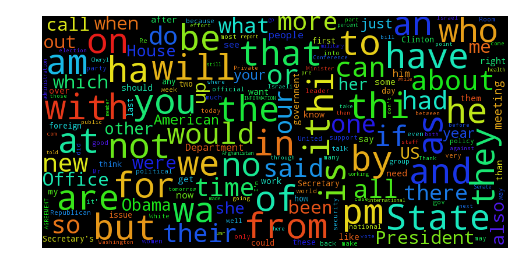

In [6]:
wordcloud = WordCloud(max_font_size=60, width=800, height=400)
wordcloud.stopwords = {}
wordcloud = wordcloud.generate(all_body_text)
plot_word_cloud(wordcloud)

## Generate word cloud with preprocessing

### Preprocessing Strategies

1. filter out some email word like `fw`, `fwd`, `subject` and so on
2. case folding: reduce all letters to lower case
3. ignoring punctuates

TODO: (maybe)

1. Try Lemmatization
2. Try Stemming

##### Remove Punctuation

In [7]:
import string
def remove_punctuation(text):
    return text.translate(str.maketrans({key: '' for key in string.punctuation}))

##### Generate stopwords

In [8]:
email_word_list = ['fw', 'fwd', 'subject', 'to', 're', 'pm', 
                   'will', 'case', 'also', 're', 'call', 'may', 'mr', 'ms', 'mrs']
stopwords = set(email_word_list).union(set(STOPWORDS))

In [9]:
import re
# function to split the digits and letters of every entities in tokens
def split_digi_letter(tokens):
    # define a empty list, store the string after splitting the digits and letters
    tokens_refined = []
    for i in tokens:
        for j in re.findall('\d+|\D+', i):
            tokens_refined.append(j)
    return tokens_refined

##### Processing words

In [10]:
# Concatenate all the Extracted Body Text
txt = (df.loc[:, 'ExtractedBodyText'].dropna()).sum()
txt = remove_punctuation(txt)
tokens = nltk.word_tokenize(txt)
tokens = [i.lower() for i in tokens if i.lower() not in stopwords]
tokens_origin = split_digi_letter(tokens)
tokens_freq = itemfreq(tokens_origin)
tokens, tokens_freq = tokens_freq[:, 0], tokens_freq[:, 1].astype(int)
tokens_x_freq = [(tokens[i], tokens_freq[i]) for i in range(len(tokens))]

##### Create word cloud

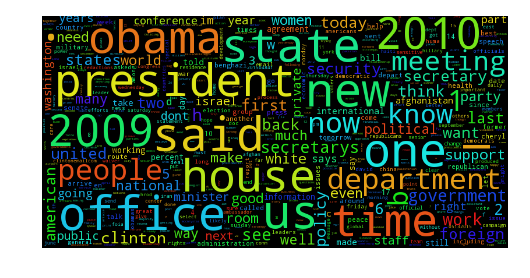

In [11]:
wordcloud = WordCloud(max_font_size=80, 
                      stopwords=STOPWORDS, 
                      width=800, 
                      height=400,
                     max_words=500).generate_from_frequencies(tokens_x_freq)
plot_word_cloud(wordcloud)

In the above wordcloud, we find words like `president`, `department`, `obama`, `state`, `office`, `meeting` are very common in this cloud. It is reasonable to think that Hillary Clinton uses her private email server for official communications which may leak top secret of america.

#### Stemming

We will use *nltk.stem.lancaster*, *nltk.stem.snowball* and *nltk.stem.wordnet* module to stem the tokens. 

In [12]:
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.stem.lancaster import LancasterStemmer

In [13]:
st = LancasterStemmer()
pt = SnowballStemmer('english')
wnl = WordNetLemmatizer()

In [14]:
def compare_stem(word1, word2, method_name):
    """if two words have same """
    if method_name == wnl:
        return method_name.lemmatize(word1) == method_name.lemmatize(word2)
    else:
        return method_name.stem(word1) ==  method_name.stem(word2)

In [15]:
word1 = 'homegene'
word2 = 'homegeneous'
method_name = wnl
print('wnl method result: ',compare_stem(word1, word2, method_name))
method_name = st
print('st method result: ',compare_stem(word1, word2, method_name))
method_name = pt
print('pt method result: ',compare_stem(word1, word2, method_name))

wnl method result:  False
st method result:  True
pt method result:  True


Above results show that *wnl* method is more accurate than the other two. Hence, we use this method in the later analysis.

In [16]:
# stemming the tokens word by LancasterStemmer
token_stemmed = [wnl.lemmatize(i) for i in tokens_origin]

In [17]:
# Since we cannot get any information from digit strings,
# we will simply drop those strings and perform analysis to the rest.
token_stemmed_reduced = [i for i in token_stemmed if not i.isdigit()]
# drop single letter tokens
token_stemmed_reduced = [i for i in token_stemmed_reduced if len(i)>1]

### Creat word cloud

In [18]:
tokens_freq_postprocess = itemfreq(token_stemmed_reduced)
tokens1, tokens_freq1 = tokens_freq_postprocess[:, 0], tokens_freq_postprocess[:, 1].astype(int)
tokens_x_freq = [(tokens1[i], tokens_freq1[i]) for i in range(len(tokens1))]

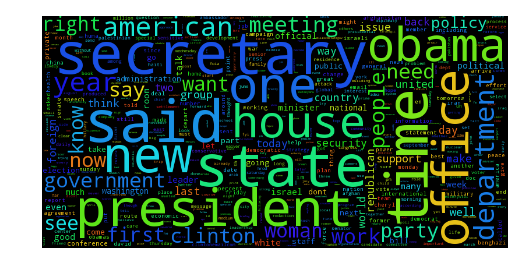

In [19]:
wordcloud = WordCloud(max_font_size=100, 
                      stopwords=STOPWORDS, 
                      width=800, 
                      height=400,
                     max_words=500).generate_from_frequencies(tokens_x_freq)
plot_word_cloud(wordcloud)

In the above wordcloud, we found a new list of words, like `secretary`, `president`, `department`, `obama`, `state`, `office`, `meeting`. They are very common in this cloud. It is reasonable to think that Hillary Clinton uses her private email server for official communications which may leak top secret of america.

### Remining problem

In [20]:
# problem: how to segement these string which may contain useful informations
j = 0
k = 0
for i in token_stemmed_reduced:
    if len(i)>15:
        j = j+1
        k = k + len(i)
print('number of non-processed word:',j,', non-processed word total length', k)

number of non-processed word: 1811 , non-processed word total length 36790


### Conclusion

The first approach creates a wordcloud on raw corpus. It is very easy to use and reflects the frequencies of the words in the data. However, it has many disadvantages. Words like `a, the, be` ... dominates the screen. These words are frequently used in any context and they didn't provide useful information about the topic of email. Besides, words are not normalized.

The second approach will process data first. By adding stopwords, tokenization, and stemming, we see a graph with much better results. Now it is much easier to know the topics of these emails without effort.

## Exercise 2

Find all the mentions of world countries in the whole corpus, using the `pycountry` utility (*HINT*: remember that
there will be different surface forms for the same country in the text, e.g., Switzerland, switzerland, CH, etc.)
Perform sentiment analysis on every email message using the demo methods in the `nltk.sentiment.util` module. Aggregate 
the polarity information of all the emails by country, and plot a histogram (ordered and colored by polarity level)
that summarizes the perception of the different countries. Repeat the aggregation + plotting steps using different demo
methods from the sentiment analysis module -- can you find substantial differences?


### Mentioned countries
1. convert to lower case and tokenize all the body text.
2. intersect body text with country names in lowercase. 
3. intersect body text with country abbreviations in lowercase.
4. union all the mentioned countries and make it unique

Difficulties:

1. Some of abbreviations `alpha_2` and `alpha_3` has other meanings.
   1. 'PM' refers to 'saint pierre and miquelon'
   2. Norway alpha_2='NO'
   and so on
   
   It is reasonable to believe, people will not refer to misleading abbreviations in their emails. In fact, after checking the coutries found by `alpha_2`, `alpha_3`, we found only very very few countries will be refer in abbreviation and most of the times it is `U.S.`. So we only add some special cases rather than checkout all of them.

2. Some countries are usually refered in a way which different from `name/alpha_2/alpha_3`.

    For example, Syria is not listed because its name is `Syrian Arab Republic`, and Russia is `Russian federal`.
    The same case happen to some other place.

    We will add special cases to it.

3. include special case  EU, U.N., Benghazi

In [21]:
# Map Country names
country_abbreviations_alpha_2 = [i.alpha_2 for i in pycountry.countries]
country_abbreviations_alpha_3 = [i.alpha_3 for i in pycountry.countries]
country_abbreviations_name    = [i.name for i in pycountry.countries]

def get_common_name_map():
    common_name_map = dict()
    common_name_map['syrian'] = 'Syrian Arab Republic'
    common_name_map['syria']  = 'Syrian Arab Republic'
    common_name_map['russia'] = 'Russian Federation'
    common_name_map['u.s.']   = 'United States'
    
    common_name_map['u.n.']     = 'UN'
    common_name_map['benghazi'] = 'Libya'
    common_name_map['eu']       = 'EU'

    for name in country_abbreviations_name:
        common_name_map[name.lower()] = name
        
    return common_name_map

common_name_map = get_common_name_map()

In [22]:
def tokenize_text(txt):
    return nltk.word_tokenize(txt)

def find_countries_in_text(tokenized_txt, country_list = common_name_map.keys()):
    lower_tokenized_text = set([i.lower() for i in tokenized_txt])
    return lower_tokenized_text.intersection(country_list)

In [23]:
tokenized_body_text = nltk.word_tokenize(all_body_text)
lower_tokenized_text = set([i.lower() for i in tokenized_body_text])

In [24]:
countries_found = find_countries_in_text(lower_tokenized_text, common_name_map.keys())
[common_name_map[c] for c in countries_found]

['Qatar',
 'Italy',
 'Cambodia',
 'Guinea',
 'Chad',
 'Monaco',
 'Canada',
 'China',
 'Armenia',
 'Philippines',
 'Japan',
 'Guinea-Bissau',
 'Colombia',
 'France',
 'Ukraine',
 'Somalia',
 'Niger',
 'Egypt',
 'EU',
 'Afghanistan',
 'Yemen',
 'Norway',
 'Sweden',
 'Jersey',
 'Ghana',
 'Switzerland',
 'Liberia',
 'Thailand',
 'Netherlands',
 'Greece',
 'Spain',
 'Azerbaijan',
 'Cameroon',
 'Turkmenistan',
 'Iraq',
 'Nicaragua',
 'Nauru',
 'Germany',
 'United States',
 'Malta',
 'Jordan',
 'Argentina',
 'Denmark',
 'Jamaica',
 'Georgia',
 'Ireland',
 'Tajikistan',
 'Kuwait',
 'Brazil',
 'Myanmar',
 'Maldives',
 'Haiti',
 'Slovakia',
 'Gabon',
 'Madagascar',
 'Senegal',
 'UN',
 'Guatemala',
 'Palau',
 'Bangladesh',
 'Portugal',
 'Libya',
 'Panama',
 'Morocco',
 'Finland',
 'Congo',
 'Rwanda',
 'Turkey',
 'Syrian Arab Republic',
 'Slovenia',
 'Israel',
 'Guyana',
 'Guam',
 'Oman',
 'Peru',
 'Uruguay',
 'Romania',
 'Suriname',
 'Uganda',
 'Hungary',
 'Lebanon',
 'Poland',
 'Kazakhstan',
 'L

### Sentiment analysis

`nltk.sentiment.util.demo_vader_instance` is used to analyse the polarity and sentiment of each

In [25]:
from nltk.sentiment import util
from nltk.sentiment import SentimentIntensityAnalyzer
vader_analyzer = SentimentIntensityAnalyzer()

In [26]:
extrected_body_text_series = df.loc[:, 'ExtractedBodyText'].dropna()

In [27]:
def map_email_bodies_to_countries(email_bodies):
    """
    Parameters
    ----------
    email_bodies : pandas.Series
    
    Return
    ------
    country_to_emails : dict
        map lowercase country names to a list of indices of emails which mentions this country.
    
    """
    assert(email_bodies.dropna().shape == email_bodies.shape)
    country_to_emails = dict(zip(set(common_name_map.values()), [[ ] for i in range(len(common_name_map.values()))]))
    emails_to_country = dict(zip(set(email_bodies.index), [[ ] for i in range(len(email_bodies.index))]))

    for idx in email_bodies.index:
        email = tokenize_text(email_bodies.loc[idx])
        countries = find_countries_in_text(email)
        for c in countries:
            country_to_emails[common_name_map[c]].append(idx)
            emails_to_country[idx].append(common_name_map[c])
            
    return country_to_emails, emails_to_country

In [28]:
map_coutry_to_emails, map_emails_to_country = map_email_bodies_to_countries(extrected_body_text_series)

In [29]:
map_coutry_to_num_emails = dict()
for c in map_coutry_to_emails.keys():
    map_coutry_to_num_emails[c] = len(map_coutry_to_emails[c])

In [30]:
country_num_emails_df = pd.DataFrame(list(map_coutry_to_num_emails.items()), columns=['country', 'num'])
country_num_emails_df.set_index('country', inplace=True)
country_num_emails_df.head()

num
country        
Mauritius     0
Kyrgyzstan    2
Yemen        12
Pakistan     71
Nauru         1

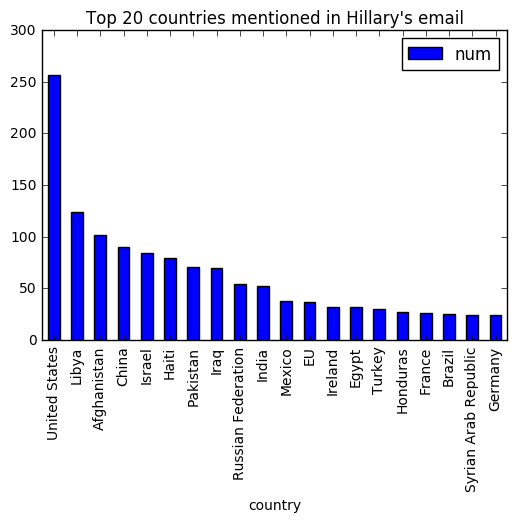

In [31]:
country_num_emails_df.sort_values('num', ascending=False).head(20).plot(kind='bar')
plt.title("Top 20 countries mentioned in Hillary's email")
plt.show()

In [32]:
def map_email_to_vader_sentiment(emails):
    polarity_score = dict()
    for idx in emails.index:
        txt = emails.loc[idx]
        polarity_score[idx] = vader_analyzer.polarity_scores(txt)
    
    return polarity_score

It may take some time...

In [33]:
import pickle
import os

if os.path.exists("map_idx_to_sentiment.pickle"):
    with open('map_idx_to_sentiment.pickle', 'rb') as handle:
        map_idx_to_sentiment = pickle.load(handle)
else:
    map_idx_to_sentiment = dict()
    map_idx_to_sentiment['vader'] = map_email_to_vader_sentiment(extrected_body_text_series)
    with open('map_idx_to_sentiment.pickle', 'wb') as handle:
        pickle.dump(map_idx_to_sentiment, handle)

In [34]:
map_idx_to_sentiment['vader'][2]

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [35]:
map_emails_to_country[2]

['Libya', 'Syrian Arab Republic']

In [36]:
a = map_idx_to_sentiment['vader'][2].values()

In [37]:
[i for i in map_idx_to_sentiment['vader'][2].values()]

[0.0, 1.0, 0.0, 0.0]

In [38]:
def extract_senti(idx, senti):
    return [idx, senti['compound'], senti['neg'], senti['pos'], senti['neu']]

In [39]:
a = np.array([extract_senti(idx, senti) for idx, senti in map_idx_to_sentiment['vader'].items()])

In [40]:
pd.DataFrame(list(map_idx_to_sentiment['vader'][2].items()))

0    1
0       pos  0.0
1       neu  1.0
2       neg  0.0
3  compound  0.0

In [41]:
compound = dict(zip(map_coutry_to_emails.keys(), np.zeros(len(map_coutry_to_emails.keys()))))
neg   = dict(zip(map_coutry_to_emails.keys(), np.zeros(len(map_coutry_to_emails.keys()))))
pos   = dict(zip(map_coutry_to_emails.keys(), np.zeros(len(map_coutry_to_emails.keys()))))
neu   = dict(zip(map_coutry_to_emails.keys(), np.zeros(len(map_coutry_to_emails.keys()))))
count = dict(zip(map_coutry_to_emails.keys(), np.zeros(len(map_coutry_to_emails.keys()))))

for idx, senti in map_idx_to_sentiment['vader'].items():
    for c in map_emails_to_country[idx]:
        compound[c] += senti['compound']
        neg[c] += senti['neg']
        pos[c] += senti['pos']
        neu[c] += senti['neu']
        count[c] += 1
        
for c, num in count.items():
    if num > 0:
        compound[c] = compound[c] / num
        neg[c] = neg[c] / num
        pos[c] = pos[c] / num
        neu[c] = neu[c] / num

In [42]:
a = []

for c, num in count.items():
    a.append((c, compound[c], neg[c],pos[c], neu[c], num))
    
country_x_senti = pd.DataFrame(a, columns=['country', 'compound', 'neg', 'pos', 'neu', 'num'])
country_x_senti.set_index('country', inplace=True)
country_x_senti.head()

compound       neg       pos       neu   num
country                                                 
Mauritius   0.000000  0.000000  0.000000  0.000000   0.0
Kyrgyzstan  0.894100  0.043000  0.121000  0.836500   2.0
Yemen      -0.005117  0.069833  0.083667  0.846417  12.0
Pakistan    0.314210  0.064465  0.097282  0.838239  71.0
Nauru       0.000000  0.000000  0.000000  1.000000   1.0

In [43]:
top_countries = country_x_senti[country_x_senti.num > 5]
top_countries.head()

compound       neg       pos       neu   num
country                                                
Yemen     -0.005117  0.069833  0.083667  0.846417  12.0
Pakistan   0.314210  0.064465  0.097282  0.838239  71.0
Germany    0.072679  0.080417  0.096083  0.823542  24.0
Kenya      0.576688  0.056750  0.129250  0.813875   8.0
Lithuania  0.820750  0.018667  0.130500  0.851000   6.0

### Overall

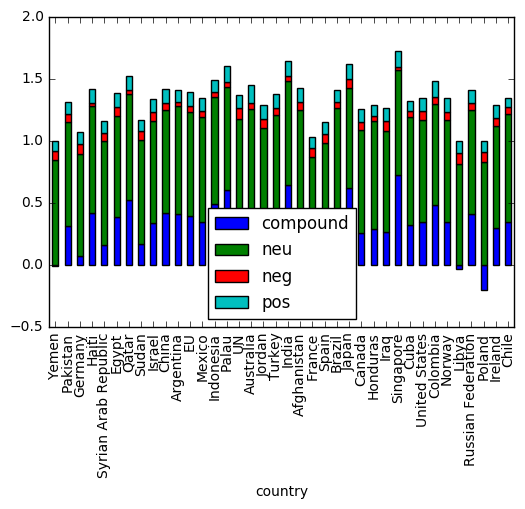

In [44]:
country_x_senti[country_x_senti.num > 10][['compound', 'neu', "neg", "pos"]].plot.bar(stacked=True)

In [45]:
top_countries.loc['Poland']

compound    -0.204064
neg          0.080929
pos          0.090500
neu          0.828643
num         14.000000
Name: Poland, dtype: float64

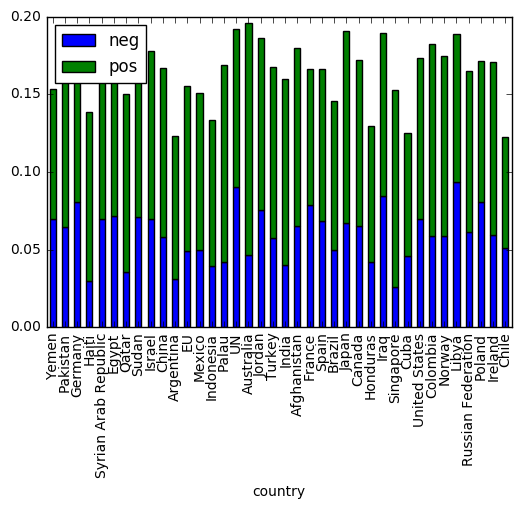

In [46]:
country_x_senti[country_x_senti.num > 10][["neg", "pos"]].plot.bar(stacked=True)

### Most Negative Sentiment countries

We sort the difference  

    neg - pos

to find the most negative sentiment. In this way, we can reduce the bias.

[]

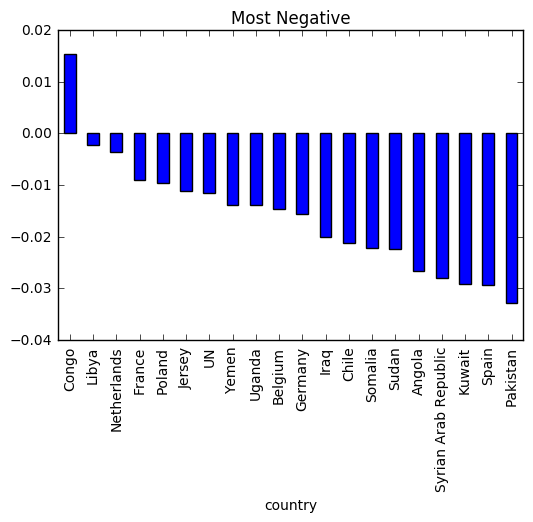

In [47]:
((top_countries['neg'] - top_countries['pos'])).sort_values(ascending=False)[:20].plot(kind='bar')
plt.title('Most Negative')
plt.plot()

It is well-known that `Benghazi attack` (Libya, 2012) is her nightmare. There is no doubt that `Libya` would rank high in this list.

It is very interesting to see that Hillary holds a much more negative view towards `Congo`. When we searched google with keyword `hillary` and `congo`, we find that she and her husband received a very high speaking fee from congo 

[http://www.forbes.com/sites/richardminiter/2016/04/17/why-did-congo-offer-clinton-650000-for-two-pics-and-a-speech/#436be0e33f11](http://www.forbes.com/sites/richardminiter/2016/04/17/why-did-congo-offer-clinton-650000-for-two-pics-and-a-speech/#436be0e33f11)

and a news about Hillary met a rude question in Congo http://thelede.blogs.nytimes.com/2009/08/13/was-hillary-clintons-answer-in-congo-the-right-one/?_r=0

[]

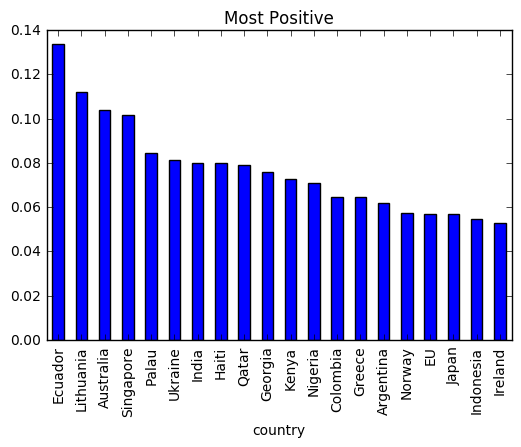

In [48]:
((top_countries['pos'] - top_countries['neg'])).sort_values(ascending=False)[:20].plot(kind='bar')
plt.title('Most Positive')
plt.plot()

## Exercise 3

Using the *models.ldamodel* module from the **gensim** library, run topic modeling over the corpus. Explore different numbers of topics (varying from 5 to 50), and settle for the parameter which returns topics that you consider to be meaningful at first sight.

In [49]:
from gensim import corpora, models
import gensim

/Users/lcav/anaconda/lib/python3.5/site-packages/gensim-0.13.3-py3.5-macosx-10.6-x86_64.egg/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


There is a confusion that we use the summed data or the data that each row contains one email's content.

### sliptted email text

In [50]:
# function to compute the tokens
def compute_tokens(body_text):
    # list of index 
    index_list = body_text.index
    # list for tokenized documents in loop
    texts = []
    for i in index_list:    
        txt = remove_punctuation(body_text.loc[i])
        tokens = nltk.word_tokenize(txt)
        tokens = [i.lower() for i in tokens if i.lower() not in stopwords]
        tokens_origin = split_digi_letter(tokens)
        # stemming the tokens word by LancasterStemmer
        token_stemmed = [wnl.lemmatize(i) for i in tokens_origin]
        # drop those strings and perform analysis to the rest.
        token_stemmed_reduced = [i for i in token_stemmed if not i.isdigit()]
        # drop single letter tokens
        token_stemmed_reduced = [i for i in token_stemmed_reduced if len(i)>1]
        # add tokens to list
        texts.append(token_stemmed_reduced)
    return texts

In [51]:
# data set we use
body_text = df.loc[:, 'ExtractedBodyText'].dropna()
# compute tokens
texts = compute_tokens(body_text)

In [52]:
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)   
#remove extremes (similar to the min/max df step used when creating the tf-idf matrix)
dictionary.filter_extremes(no_below=1, no_above=0.8)
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

In [54]:
lda = models.LdaModel(corpus, num_topics=5, 
                      id2word=dictionary, update_every=5, 
                      chunksize=1000, passes=50)

In [55]:
lda.show_topics()

[(0,
  '0.007*"republican" + 0.007*"woman" + 0.006*"said" + 0.005*"bill" + 0.005*"vote" + 0.005*"senate" + 0.004*"percent" + 0.004*"issue" + 0.004*"new" + 0.004*"democrat"'),
 (1,
  '0.009*"koch" + 0.008*"party" + 0.006*"tea" + 0.005*"mill" + 0.004*"beck" + 0.004*"ok" + 0.004*"group" + 0.004*"republican" + 0.004*"movement" + 0.004*"conservative"'),
 (2,
  '0.036*"secretary" + 0.029*"state" + 0.029*"office" + 0.019*"department" + 0.017*"meeting" + 0.014*"room" + 0.010*"arrive" + 0.010*"house" + 0.010*"en" + 0.010*"route"'),
 (3,
  '0.005*"state" + 0.005*"american" + 0.005*"one" + 0.005*"president" + 0.004*"new" + 0.004*"obama" + 0.004*"time" + 0.004*"said" + 0.004*"government" + 0.004*"year"'),
 (4,
  '0.011*"fyi" + 0.008*"see" + 0.007*"know" + 0.007*"work" + 0.006*"now" + 0.006*"tomorrow" + 0.006*"im" + 0.006*"want" + 0.005*"pls" + 0.005*"need"')]

Here, I convert the topics into just a list of the top 20 words in each topic.

In [72]:
topics_matrix = lda.show_topics(formatted=False, num_words=20)
for i in range(len(topics_matrix)):
    topics_matrix_word = list(np.asarray(topics_matrix[i][1])[:,0])
    print([str(word) for word in topics_matrix_word])
    print()

['republican', 'woman', 'said', 'bill', 'vote', 'senate', 'percent', 'issue', 'new', 'democrat', 'state', 'year', 'one', 'president', 'house', 'enough', 'senator', 'congress', 'candidate', 'obama']

['koch', 'party', 'tea', 'mill', 'beck', 'ok', 'group', 'republican', 'movement', 'conservative', 'obama', 'cheryl', 'david', 'millscdstategov', 'charles', 'said', 'political', 'first', 'million', 'company']

['secretary', 'state', 'office', 'department', 'meeting', 'room', 'arrive', 'house', 'en', 'route', 'depart', 'private', 'residence', 'conference', 'time', 'doc', 'benghazi', 'daily', 'staff', 'date']

['state', 'american', 'one', 'president', 'new', 'obama', 'time', 'said', 'government', 'year', 'people', 'policy', 'country', 'israel', 'clinton', 'world', 'party', 'political', 'right', 'united']

['fyi', 'see', 'know', 'work', 'now', 'tomorrow', 'im', 'want', 'pls', 'need', 'today', 'think', 'time', 'email', 'good', 'let', 'talk', 'thx', 'clintonemailcom', 'huma']



### Summed email text

In [85]:
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary([token_stemmed_reduced]) 
#remove extremes (similar to the min/max df step used when creating the tf-idf matrix)
dictionary.filter_extremes(no_below=1, no_above=0.8)
# convert tokenized documents into a document-term matrix
corpus1 = [dictionary.doc2bow(text) for text in [token_stemmed_reduced]]

In [86]:
corpus1

[[]]

It seems that we cannot use the summed information. The remove extremes will prevent outputing any corpus.

In [87]:
lda1 = models.LdaModel(corpus1, num_topics=5, 
                      id2word=dictionary, update_every=5, 
                      chunksize=1000, passes=50)

ValueError: cannot compute LDA over an empty collection (no terms)

In [ ]:
lda1.show_topics()

Here, I convert the topics into just a list of the top 20 words in each topic.

In [ ]:
topics_matrix = lda1.show_topics(formatted=False, num_words=20)
topics_matrix = np.array(topics_matrix)

topic_words = topics_matrix[:,:,1]
for i in topic_words:
    print([str(word) for word in i])
    print()

## Exercise 4

BONUS: build the communication graph (unweighted and undirected) among the different email senders and recipients using the NetworkX library. Find communities in this graph with community.best_partition(G) method from the community detection module. Print the most frequent 20 words used by the email authors of each community. Do these word lists look similar to what you've produced at step 3 with LDA? Can you identify clear discussion topics for each community? Discuss briefly the obtained results.

In [155]:
all_sender_receiver = (df.loc[:, ['MetadataFrom','SenderPersonId','MetadataTo']].dropna())

In [156]:
all_sender_receiver.head()

MetadataFrom  SenderPersonId         MetadataTo
Id                                                      
1   Sullivan, Jacob J            87.0                  H
3     Mills, Cheryl D            32.0                 ;H
4     Mills, Cheryl D            32.0                  H
5                   H            80.0       Abedin, Huma
6                   H            80.0  Russorv@state.gov

In [157]:
print('number of unique sender based on name:',len(all_sender_receiver['MetadataFrom'].unique()))
print('number of unique sender based on ID:', len(all_sender_receiver['SenderPersonId'].unique()))
print('number of unique receiver based on name:', len(all_sender_receiver['MetadataTo'].unique()))

number of unique sender based on name: 243
number of unique sender based on ID: 124
number of unique receiver based on name: 229


In [158]:
receiver_name_set = set(all_sender_receiver['MetadataTo'].unique())
sender_name_set = set(all_sender_receiver['MetadataFrom'].unique())
sender_id_set = set(all_sender_receiver['SenderPersonId'].unique())

Clearly, we need to use ID to identify the sender and receiver. Since we do not have the ID for the corresponding receiver, we have to build a dictionary of sender ID and name. We find that some receivers's name cannot be found in the dictionary, hence, we will add new nodes for these names which means creat some ID for them.

In [184]:
# the dataframe of sender and its id
all_sender = (df.loc[:, ['MetadataFrom','SenderPersonId']].dropna())
# for each id, sum all the corresponding name string
df_id_name = all_sender.groupby('SenderPersonId').sum()
# unique receiver name
unique_receiver_name = all_sender_receiver['MetadataTo'].unique()

In [277]:
# dictionary to map receiver name to id
dic_id_receiver = {'H':80,';H':80, 'l': 227, 'Hillary':80, 'Secretary':80, 'Secretary Clinton':80, 
                   'H2':80, 'Clinton':80, 'Clinton, Hillary':80, 'Clinton, Hillary Rodham':80}
# remainding receiver name
remain_receiver_name = list(unique_receiver_name.copy())
for i in list(dic_id_receiver.keys()):
    remain_receiver_name.remove(i)
for single_name in unique_receiver_name:
    if single_name not in dic_id_receiver.keys():
        id_num_store = []
        # since we mapped Hillary, we remove her from the id list
        for single_id in df_id_name.index[df_id_name.index!=80]:
            condition1 = single_name == df_id_name.loc[single_id,'MetadataFrom']
            condition2 = (df_id_name.loc[single_id,'MetadataFrom']).count(single_name)>1
            if condition1 or condition2:
                id_num_store.append(((df_id_name.loc[single_id,'MetadataFrom']).count(single_name),single_id))
        if id_num_store != []:
            # max count
            max_count_index = np.argmax(np.array(id_num_store)[:,0])
            # assert the dictionary
            select_index = np.array(id_num_store)[max_count_index,1]
            dic_id_receiver[single_name] = select_index
            remain_receiver_name.remove(single_name)

In [278]:
remain_receiver_name

['Russorv@state.gov',
 'sullivanjj@state.gov',
 'Flores, Oscar',
 'abedinh@state.gov',
 'millscd@state.gov',
 'hanleymr@state.gov',
 'ValmoroLj@state.gov',
 'Burnswj@state.gov',
 'NidesTR@state.gov',
 'Jake.Sullivan',
 'Jake.sullivan',
 'michele.flournoy',
 'brian',
 'bam@mikulski.senate.gov',
 'ntanden',
 'jacobjlew',
 'Huma Abedin',
 'rsloan',
 'jilotyLC@state.gov',
 'stalbott',
 'balderstonkm@state.gov',
 'SteinbergJB@state.gov',
 'mhcaleja@state.gov',
 'jpodesta',
 'sulllivanjj@state.gov',
 'wsherman',
 'abendinh@state.gov',
 'adedinh@state.gov',
 'Imuscatine',
 'muscatinel@state.gov',
 'cholletdh@state.gov',
 'BStrider',
 'jfarrow',
 'Axelrod_D',
 'SBerger',
 'wburns66@',
 'shapiroa@state.gov',
 'David_Garten@lautenberg.senate.gov',
 'verveerms@state.gov',
 'kohhh@state.gov',
 'lewjj@state.gov',
 'TFlourno',
 'jpiercy',
 'Valmorolj@state.gov',
 'FuchsMH@state.gov',
 'cherieblair',
 'Terry.Duffy',
 'burnswj@state.gov',
 'crowleypj@state.gov',
 'CampbellKM@state.gov',
 'rooneym@stat

Need to group the remain_receiver_name as well, to do!!

In [299]:
# add new id to each element of remain_receiver_name and attach them to the dic_id_receiver
for i in range(len(remain_receiver_name)):
    dic_id_receiver[remain_receiver_name[i]] = 228+i

In [160]:
# add a colume of ReceiverPersonId
all_sender_receiver['ReceiverPersonId'] = 0

In [281]:
for i in all_sender_receiver.index:
    # receiver name
    receiver_name = all_sender_receiver.ix[i,2]
    # give receiver id
    all_sender_receiver.ix[i,3] = dic_id_receiver[receiver_name]

In [282]:
all_sender_receiver

MetadataFrom  SenderPersonId            MetadataTo  \
Id                                                                  
1         Sullivan, Jacob J            87.0                     H   
3           Mills, Cheryl D            32.0                    ;H   
4           Mills, Cheryl D            32.0                     H   
5                         H            80.0          Abedin, Huma   
6                         H            80.0     Russorv@state.gov   
7           Mills, Cheryl D            32.0                     H   
8                         H            80.0          Abedin, Huma   
9         Sullivan, Jacob J            87.0                     H   
11        Sullivan, Jacob J            87.0                     H   
13        Sullivan, Jacob J            87.0                     H   
14    Slaughter, Anne-Marie            10.0                     H   
15          Mills, Cheryl D            32.0                     H   
16       Koh, Harold Hongju            77.0                     H   
17         Sherman, Wendy R           213.0                     H   
18         Sherman, Wendy R           213.0                     H   
19        Sullivan, Jacob J            87.0                     H   
20        Sullivan, Jacob J            87.0      Sherman, Wendy R   
21                        H            80.0  sullivanjj@state.gov   
22                        H            80.0     Russorv@state.gov   
23                        H            80.0     Russorv@state.gov   
24                        H            80.0  sullivanjj@state.gov   
25        Sullivan, Jacob J            87.0                     H   
26       Blumenthal, Sidney           194.0                     H   
27        Sullivan, Jacob J            87.0                     H   
28          Mills, Cheryl D            32.0                     H   
29           Strider, Burns            21.0                     H   
30             Abedin, Huma            81.0                     H   
31        Sullivan, Jacob J            87.0                     H   
32          Mills, Cheryl D            32.0                     H   
34                        H            80.0     Russorv@state.gov   
...                     ...             ...                   ...   
7916               sbwhoeop           194.0                     H   
7917      Sullivan, Jacob J            87.0                     H   
7918    Rodriguez, Miguel E           148.0                     H   
7919        Mills, Cheryl D            32.0                     H   
7920     Verveer, Melanne S           143.0                     H   
7921           Abedin, Huma            81.0                     H   
7922        Mills, Cheryl D            32.0                     H   
7923     Schwerin, Daniel B            48.0                     H   
7924       Daniel, Joshua J           103.0                     H   
7925  Slaughter, Anne-Marie            10.0                     H   
7926       Verma, Richard R           180.0                     H   
7927        Mills, Cheryl D            32.0                     H   
7928        Mills, Cheryl D            32.0                     H   
7929         Sullivan, Jake            87.0                     H   
7930        Mills, Cheryl D            32.0                     H   
7931        Mills, Cheryl D            32.0                     H   
7932        Mills, Cheryl D            32.0                     H   
7933      Sullivan, Jacob J            87.0                     H   
7934               sbwhoeop           194.0                     H   
7935           Abedin, Huma            81.0                     H   
7936           Abedin, Huma            81.0                     H   
7937        Mills, Cheryl D            32.0                     H   
7938        Mills, Cheryl D            32.0                     H   
7939          Stern, Todd D           204.0                     H   
7940         Sullivan, Jake            87.0                     H   
7941       Ve

### Build the communication graph

In [92]:
import networkx as nx

In [293]:
# node list
node_list = list(set(all_sender_receiver['SenderPersonId'].unique()).union(set(all_sender_receiver['ReceiverPersonId']
                                                                         .unique())))
# edge list
edge_list = []
for i in all_sender_receiver.index:
    sender_id = all_sender_receiver.ix[i, 1]
    receiver_id = all_sender_receiver.ix[i, 3]
    edge_list.append((sender_id,receiver_id))

In [295]:
# initialize graph
G=nx.Graph()
# add node
G.add_nodes_from(node_list)
# add edge
G.add_edges_from(edge_list)

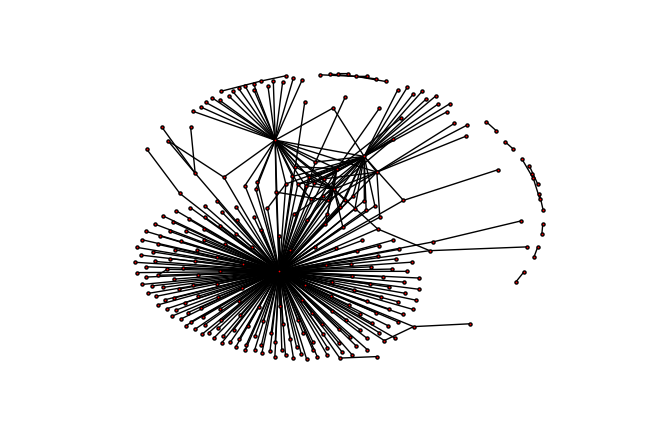

In [309]:
# draw graph, we can make it nicer later
nx.draw(G, node_size= 5)